In [81]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from randomuniverse import RandomUniverse
%matplotlib inline


In [82]:
# Read the file "Advertising_csv"
df = pd.read_csv('Advertising_adj.csv')

# Take a quick look at the data
df.head()


tv   sales
0  230.1  465.26
1   44.5  218.95
2   17.2  195.79
3  151.5  389.47
4  180.8  271.58

In [83]:
# Define a bootstrap function, which takes as input a dataframe 
# It must output a bootstrapped version of the input dataframe
def bootstrap(df):
    selectionIndex = np.random.randint(1, 100, size = 9)
    new_df = df.iloc[selectionIndex]
    return new_df




In [84]:
# Initialize two empty lists to store the beta values
beta0_list, beta1_list = [],[]

# Choose the number of "parallel" Universes to generate the new dataset
number_of_bootstraps = 500

# Loop through the number of bootstraps
for i in range(number_of_bootstraps):

    # Call the bootstrap function to get a bootstrapped version of the data
    df_new = bootstrap(df)

    # Find the mean of the predictor values i.e. tv
    xmean = df_new["tv"].mean()

    # Find the mean of the response values i.e. sales
    ymean = df_new["sales"].mean()

    #'X' is the predictor variable given by df_new.tv  
    X = df_new["tv"]
    
    #'y' is the reponse variable given by df_new.sales 
    y = df_new["sales"]
    
    # Compute the analytical values of beta0 and beta1 using the 
    # equation given in the hints
    beta1 = (((df_new.tv - xmean)*(df_new.sales - ymean)).sum())/(((df_new.tv - xmean)**2).sum())
    beta0 = ymean-beta1*xmean


    # Append the calculated values of beta1 and beta0 to the appropriate lists
    beta0_list.append(beta0)
    beta1_list.append(beta1)


1.2432964990582607
1.1554225892420986
1.021787247592303
1.32560587767733
1.065234513676838
1.2950274655882132
0.9577980175303634
1.2278399342045325
1.3891861897154325
1.0420142341559475
1.5851999861768247
1.399587212155109
0.661454696124388
1.0013195963792063
1.3728361520227095
1.2132621691536296
1.4086166325954523
1.4659711524324255
0.49133173865052243
0.8015438476195453
0.8985257319648876
1.1604323448599734
1.3473305269344091
0.8932325962216926
1.2330502551766733
0.8746204554569695
0.9970159584186775
0.5758484924059639
1.4343995813704555
0.7275122978886382
1.1399081593608835
0.8377896711569536
0.6114539594576031
1.531438137770698
1.170143850009829
1.2474547481447402
0.6711222387091461
0.7746542719576263
1.3246783505434157
0.6250640036439846
0.7786610987156233
0.8123385017343959
0.45926747853447814
1.3800864319216914
0.8846115812308584
0.9862225383131225
1.0349327029094024
0.6677374716610692
1.2550139419346782
1.0090280076809681
1.065144229798018
0.720331785648837
1.3455674217149303
1

In [85]:
### edTest(test_beta) ###

# Compute the mean of the beta values
beta0_mean = np.mean(beta0_list)
beta1_mean = np.mean(beta1_list)


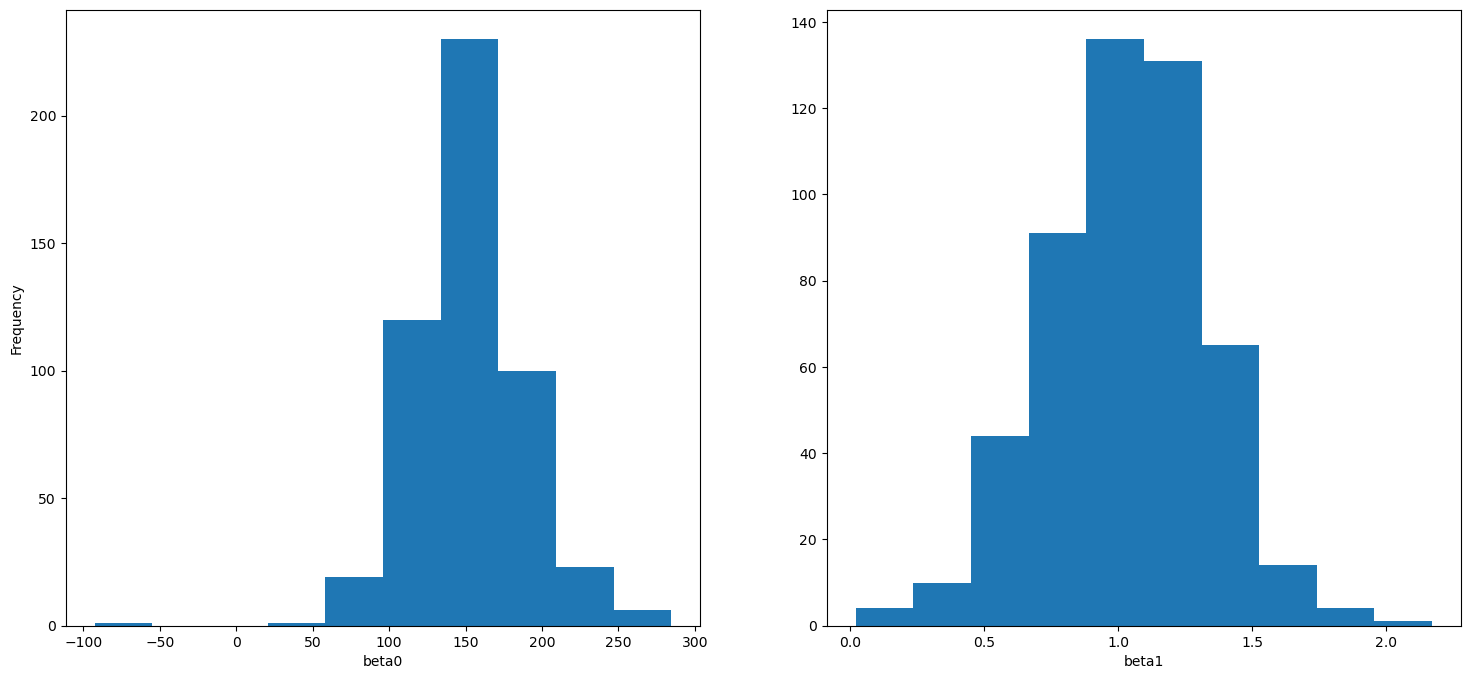

In [86]:
# Plot histograms of beta_0 and beta_1 using lists created above 

fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].hist(beta0_list)
ax[1].hist(beta1_list)
ax[0].set_xlabel("beta0")
ax[1].set_xlabel("beta1")
ax[0].set_ylabel('Frequency')
plt.show();


### Compare the plots with the results from the RandomUniverse() function

In [87]:
# Helper code to visualise the similarity between the bootstrap
# function here & the RandomUniverse() function from last exercise
beta0_randUni, beta1_randUni = [],[]

parallelUniverses = 500

for i in range(parallelUniverses):
    df_new = RandomUniverse(df)
    
    xmean = df_new.tv.mean()
    ymean = df_new.sales.mean()

    # Using linear algebra result as discussed in lecture
    beta1 = (((df_new.tv - xmean)*(df_new.sales - ymean)).sum())/(((df_new.tv - xmean)**2).sum())
    beta0 = ymean - beta1*xmean

  
    beta0_randUni.append(beta0)
    beta1_randUni.append(beta1)


In [88]:
# Helper code to plot the bootstrapped beta values & the ones from random universe
def plotmulti(list1, list2):
    fig, axes = plt.subplots(1,2, figsize = (10,4), sharey = 'row')
    axes[0].hist(list1);
    axes[0].set_xlabel('Beta Distribution')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Bootstrap')
    axes[1].hist(list2);
    axes[1].set_xlabel('Beta Distribution')
    axes[1].set_title('Random Universe')
    plt.show();


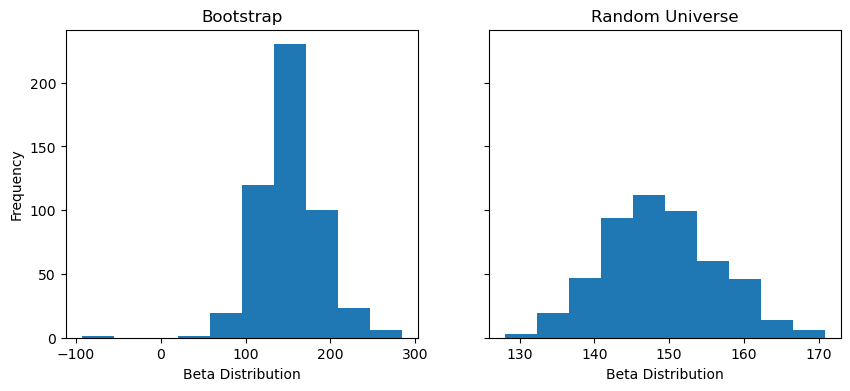

In [89]:
# Call the 'plotmulti' function above to compare the two histograms for beta0
plotmulti(beta0_list, beta0_randUni)


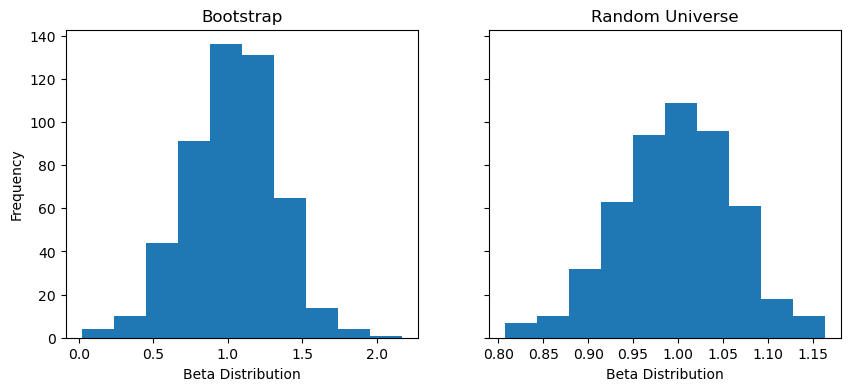

In [90]:
# Call the 'plotmulti' function above to compare the two histograms for beta1
plotmulti(beta1_list, beta1_randUni)
